### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

### About

Insurance premium refers to the amount of money an individual or business pays to an insurance company in exchange for insurance coverage. This payment is typically made on a regular basis, such as monthly or annually, and is essential for maintaining the insurance policy. The premium amount is determined by various factors, and understanding these factors is crucial for individuals and businesses when selecting insurance coverage.

### 1) Problem Statement

- Predicting Insurance Premiums based on Policyholder Characteristics and Historical Data.
- There exists a significant challenge in accurately predicting insurance premiums for policyholders. The complexity of determining premium amounts involves a multitude of factors, including individual characteristics, historical claims data, and external variables. 
- Developing a robust predictive model for insurance premium calculation is crucial for insurance companies to optimize risk assessment, pricing strategies, and provide fair and competitive premiums.

### 2) Data Collection

- Insurance.csv file is obtained from the Machine Learning course website (Spring 2017) from Professor Eric Suess at http://www.sci.csueastbay.edu/~esuess/stat6620/#week-6.
- The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns).

Link: https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### Load the dataset

In [34]:
df = pd.read_csv("insurance.csv")

### Top 5 records

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Shape of the dataset

In [36]:
df.shape

(1338, 7)

### Summary of the dataset

In [37]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### Check the datatypes in the dataset

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3) Exploring the Data

In [39]:
numeric_features = df.select_dtypes(exclude="object").columns
categorical_features = df.select_dtypes(include="object").columns

print(f"number of numerical features: {len(numeric_features)}")
print(f"number of categorical features: {len(categorical_features)}")

number of numerical features: 4
number of categorical features: 3


In [40]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("*" * 50)

sex
male      50.523169
female    49.476831
Name: proportion, dtype: float64
**************************************************
smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64
**************************************************
region
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: proportion, dtype: float64
**************************************************


`Conclusion:`
- Most of the people are from southeast `regions`.
- Most of the people are `non-smoker`.
- Almost equal percentage of male and female people.

### Univariate Analysis

- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are

- ***Bivariate Analysis:*** The analysis of two variables.
- ***Multivariate Analysis:*** The analysis of two or more variables.

### Numerical Features

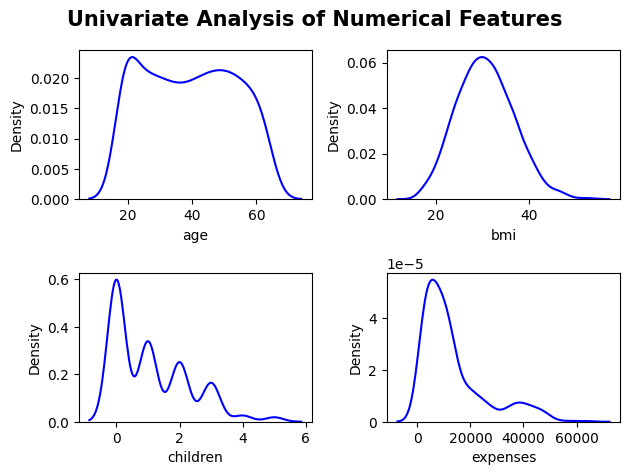

In [41]:
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=15,fontweight="bold")
for i in range(0,len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x = df[numeric_features[i]],color="blue")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

`Conclusion:`
- `bmi` is normally distributed.
- `age` is almost following normal distribution.
- `expenses` is right skewed.
- `children` can be treated as categorical feature in which most of them have 0 children and then followed by 2 children

### Categorical Features

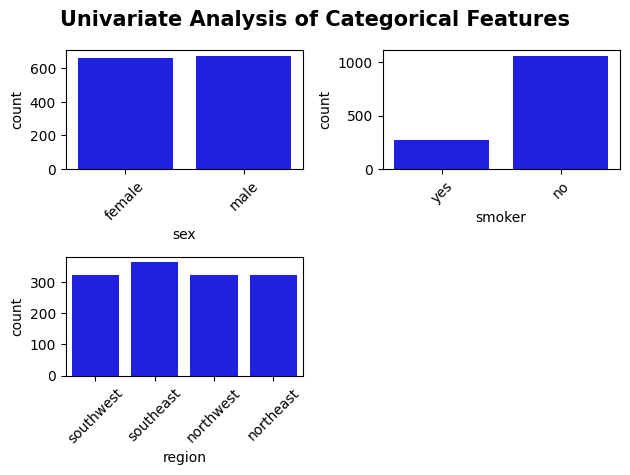

In [42]:
plt.suptitle("Univariate Analysis of Categorical Features",fontsize=15,fontweight="bold")
for i in range(0,len(categorical_features)):
    plt.subplot(2,2,i+1)
    sns.countplot(x = df[categorical_features[i]],color="blue")
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

`Conclsuion:`
- `smoker` features have one single category dominating
- Rest all features are balanced

### Multivariate Analysis

- Multivariate analysis is the analysis of more than one variable.

In [43]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique())<=25]
continuous_features = [feature for feature in numeric_features if len(df[feature].unique())>25]

In [44]:
print(f"Number of discrete features: {discrete_features}")
print(f"Number of continuous features: {continuous_features}")

Number of discrete features: ['children']
Number of continuous features: ['age', 'bmi', 'expenses']


### Check Multicollinearity in Numerical Features

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


<Axes: >

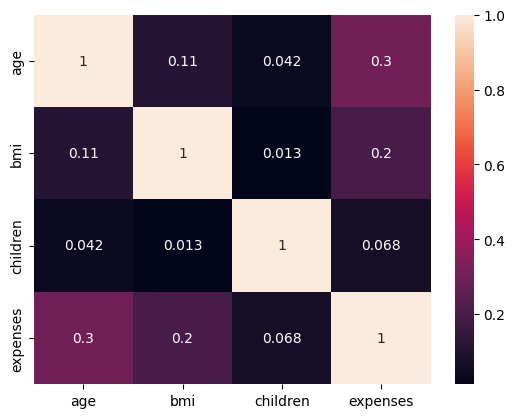

In [46]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2g")

`Conclusion:`
- There is no multicollinearity between numerical features

### Check Multicollinearity for Categorical features

<Axes: >

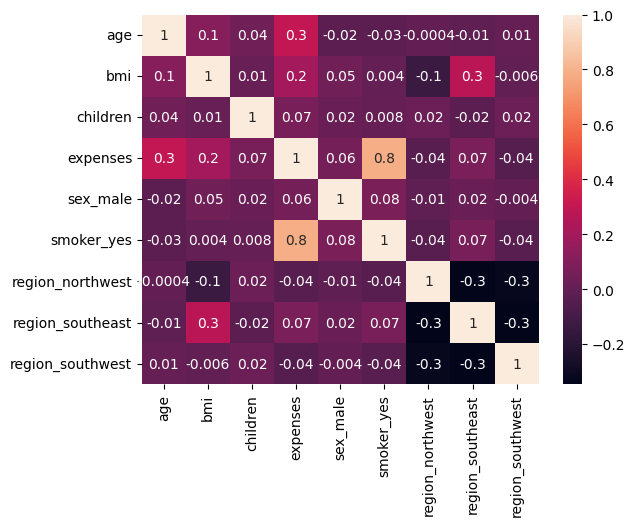

In [47]:
sns.heatmap(pd.get_dummies(df,drop_first=True).corr(),annot=True,fmt=".1g")

`Conclusion:`
- There is no multicollinearity between categorical features

### Checking Null Values

In [48]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

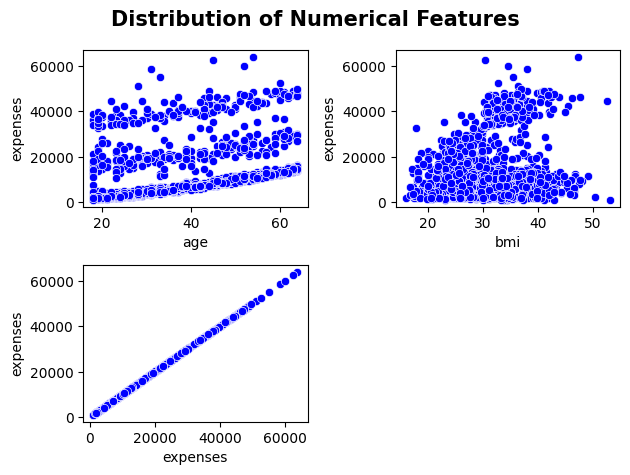

In [49]:
plt.suptitle("Distribution of Numerical Features",fontsize=15,fontweight="bold")
for i in range(0,len(continuous_features)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x = df[continuous_features[i]],y=df["expenses"],color="blue")
    plt.xlabel(continuous_features[i])
    plt.ylabel("expenses")
    plt.tight_layout()

### Initial Analysis Report

- ***There are No missing values in the dataset.***
- ***`expenses` is the target to predict.***
- ***There is no multicollinearity between numerical features.***
- ***There is no multicollinearity between categorical features.***
- ***`smoker` features have one single category dominating.***
- ***Rest all features are balanced.***
- ***`bmi` is normally distributed.***
- ***`age` is almost following normal distribution.***
- ***`expenses` is right skewed.***
- ***`children` can be treated as categorical feature in which most of them have 0 children and then followed by 2 children.***

### 4. Visualization

#### 4.1 Visualize the Target Feature

<Axes: xlabel='expenses', ylabel='Density'>

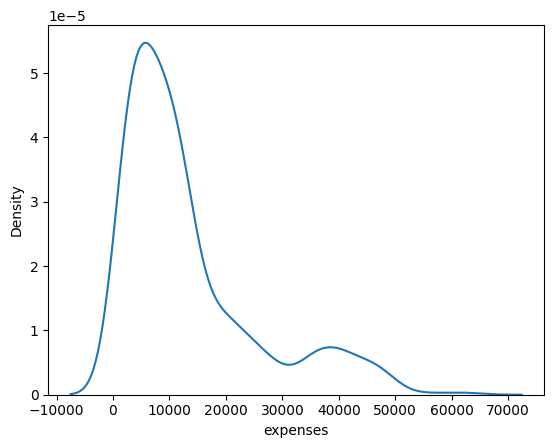

In [50]:
sns.kdeplot(x = df["expenses"])

`Conclusion:`
- It is right skewed.

#### 4.2) How does age relate to insurance expenses? Is there a trend indicating higher or lower expenses with age?

<Axes: xlabel='age', ylabel='expenses'>

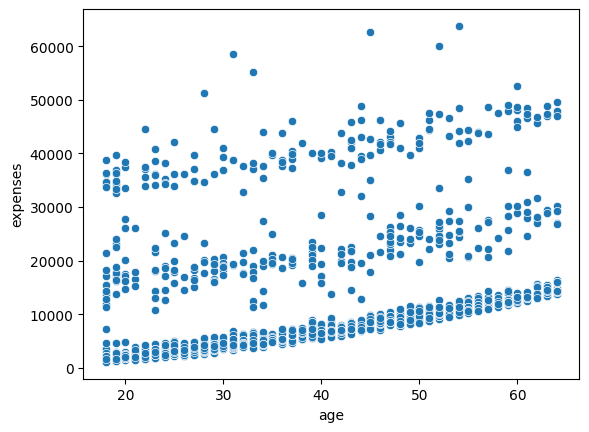

In [51]:
sns.scatterplot(x=df["age"],y=df["expenses"])

`Conclusion:`
- Higher the age more will be the medical expenses.

#### 4.3) Is there a difference in insurance expenses between males and females?

<Axes: xlabel='sex', ylabel='expenses'>

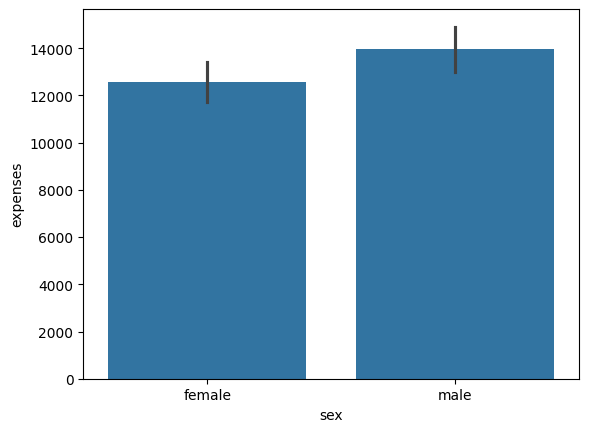

In [52]:
sns.barplot(x="sex",y="expenses",data=df)

<Axes: xlabel='sex', ylabel='expenses'>

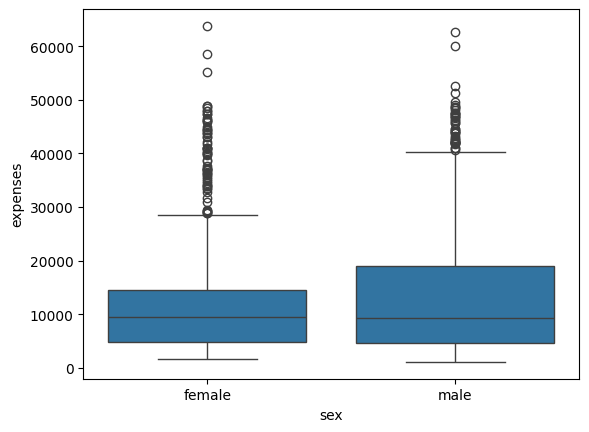

In [53]:
sns.boxplot(x="sex",y="expenses",data=df)

<Axes: xlabel='sex', ylabel='expenses'>

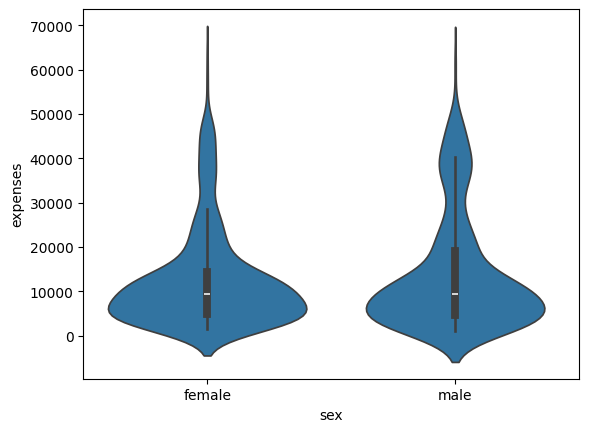

In [54]:
sns.violinplot(x="sex",y="expenses",data=df)

`Conclusion:`
- Male have much higher medical expenses as compared to females.

#### 4.4) Explore the relationship between BMI and insurance expenses. Does BMI have a noticeable impact on premiums? 

<Axes: xlabel='bmi', ylabel='expenses'>

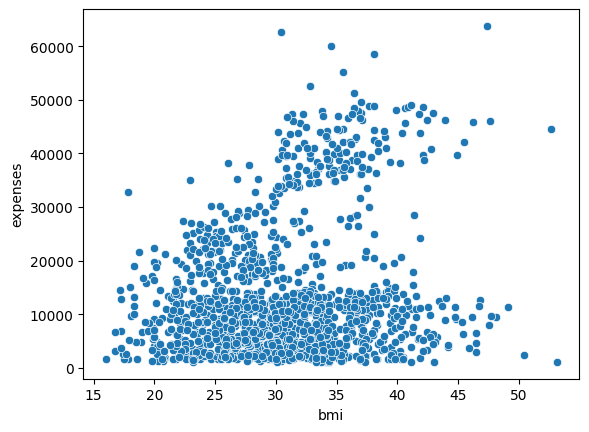

In [55]:
sns.scatterplot(x=df["bmi"],y=df["expenses"])

`Conclusion:`
- BMI between 30 to 40 have higher medical expenses.

#### 4.5) Investigate the relationship between the number of children and insurance expenses. Does having more children influence premiums?

<Axes: xlabel='children', ylabel='expenses'>

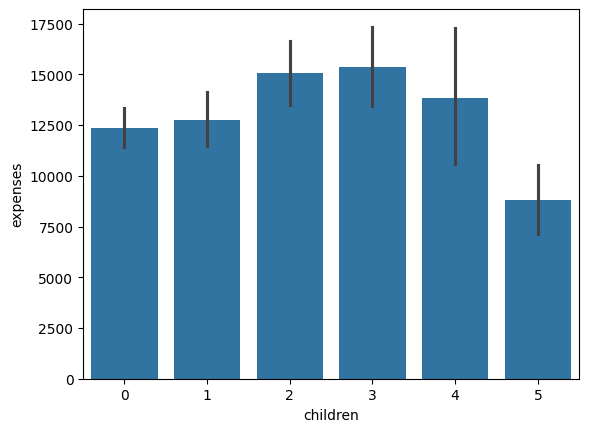

In [56]:
sns.barplot(x="children",y="expenses",data=df)

<Axes: xlabel='children', ylabel='expenses'>

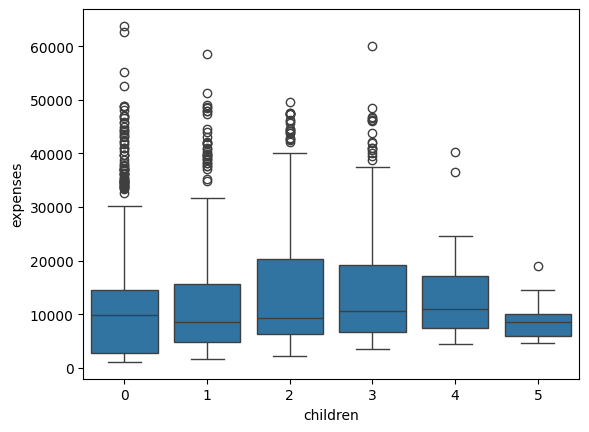

In [57]:
sns.boxplot(x="children",y="expenses",data=df)

<Axes: xlabel='children', ylabel='expenses'>

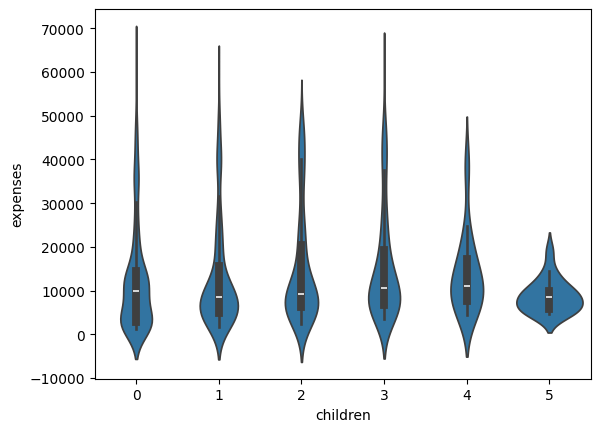

In [58]:
sns.violinplot(x="children",y="expenses",data=df)

`Conclusion:`
- Children having 2 or 3 children will have higher medical expenses

#### 4.6) Analyze the difference in insurance expenses between smokers and non-smokers.

<Axes: xlabel='smoker', ylabel='expenses'>

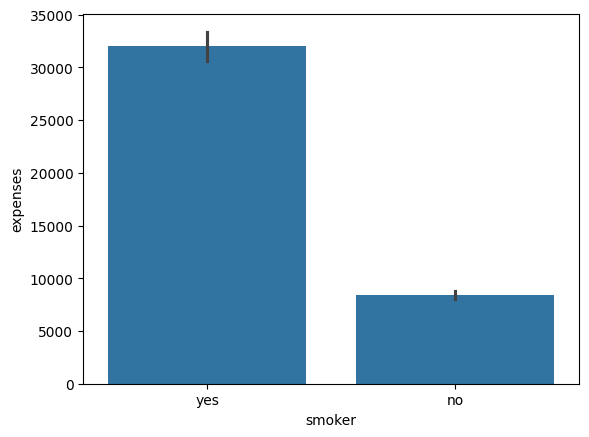

In [60]:
sns.barplot(x="smoker",y="expenses",data=df)

<Axes: xlabel='smoker', ylabel='expenses'>

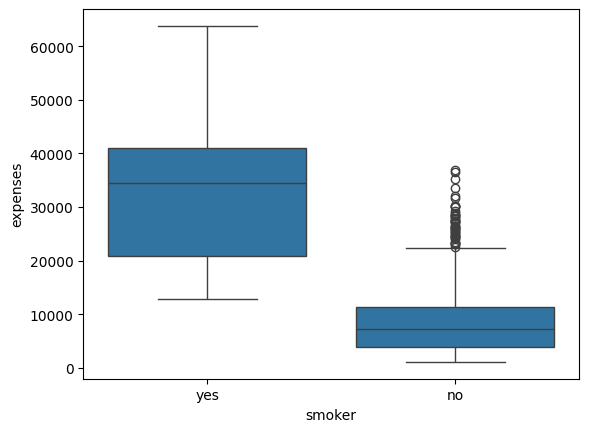

In [61]:
sns.boxplot(x="smoker",y="expenses",data=df)

<Axes: xlabel='smoker', ylabel='expenses'>

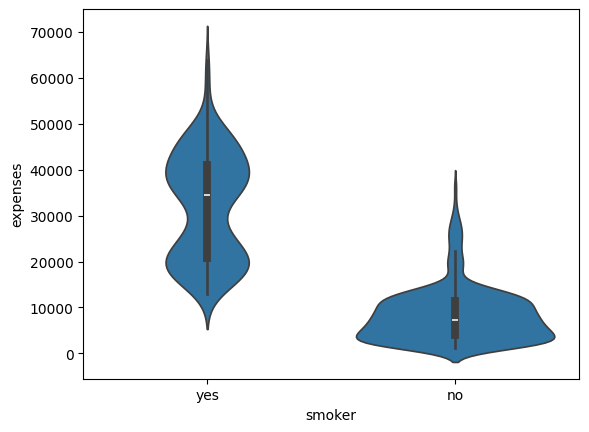

In [59]:
sns.violinplot(x="smoker",y="expenses",data=df)

`Conclusion:`
- Smoker will have higher medical expenses.

#### 4.7) Explore how insurance expenses vary across different regions.

<Axes: xlabel='region', ylabel='expenses'>

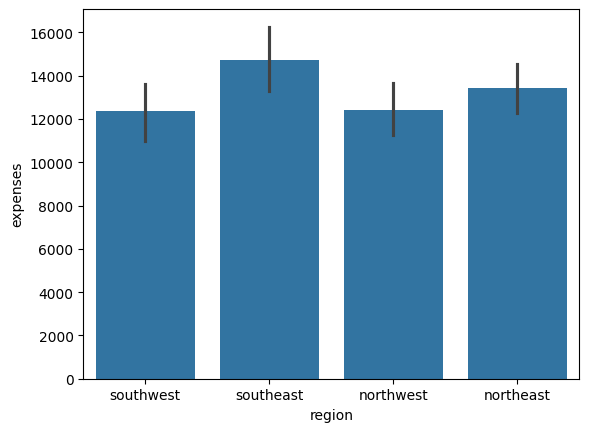

In [63]:
sns.barplot(x="region",y="expenses",data=df)

<Axes: xlabel='region', ylabel='expenses'>

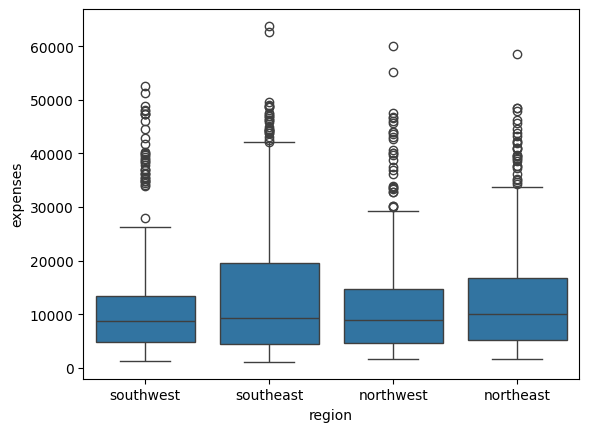

In [64]:
sns.boxplot(x="region",y="expenses",data=df)

<Axes: xlabel='region', ylabel='expenses'>

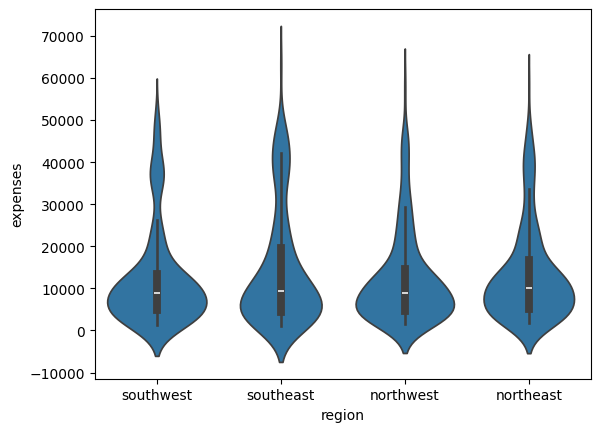

In [65]:
sns.violinplot(x="region",y="expenses",data=df)

`Conclusion:`
- People from southeast region, have much higher medical expenses

#### Correlation Analysis

In [67]:
df.corr(numeric_only=True)["expenses"]

age         0.299008
bmi         0.198576
children    0.067998
expenses    1.000000
Name: expenses, dtype: float64